# Figure 02
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### October 2018
### Milo BC @ UC Berkeley

Second figure - two panels. Panel (A) Ghost ray image and color the hyperboloid and paraboloid component, straight through and refer to in the text to explain all of it. all sources should be at infinity! Panel (B) image the aperture with colors of the rays. where ghost rays are entering optics.

In [9]:
## General packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
## Specific packages
from foxsisim.util import load_rays
from foxsisim.detector import Detector

In [3]:
angle = 28.0
## Rays location:
rays_folder = '/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/'

## Creating empty lists:
All_Drays, All_Hrays, All_Prays, All_Srays = [], [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []
All_Sx, All_Sy = [], []

In [27]:
# Loading Rays:
Lrays = load_rays(rays_folder+'rays_Angle_=_'+str(angle)+'.csv')
# Fix little bug in rays:
for ray in Lrays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Lrays)
'''Defining D, H, and P rays'''
Drays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-6:] == 'Source')]
Hrays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

All_Drays.append(Drays)
All_Hrays.append(Hrays)
All_Prays.append(Prays)
All_Srays.append(Srays)
    
sim_scale = 1.0    # 1cm = 17.4 arcmin
#sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
All_Hx.append(Hx)
All_Hy.append(Hy)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)
All_Px.append(Px)
All_Py.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)
All_Dx.append(Dx)
All_Dy.append(Dy)
    
# StraightThrough
Sx, Sy = [], []
for ray in Srays:
    Sx.append(ray.pos[0]*sim_scale)
    Sy.append(ray.pos[1]*sim_scale)
All_Sx.append(Sx)
All_Sy.append(Sy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_28.0.csv loaded.


## Let's now see the optics cross-section

In [39]:
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.151,4.9,4.659,4.429,4.21,4.0,3.799,3.59,3.38,3.17]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]

prays = [ray.pos for ray in Lrays]
orays = [ray.ori for ray in Lrays]
srays = [ray.src for ray in Lrays]
drays = [ray.des for ray in Lrays]
trays = [ray.tag for ray in Lrays]
hrays = [ray.hist for ray in Lrays]
brays = [ray.bounces for ray in Lrays]
deadrays = [ray.dead for ray in Lrays]

In [56]:
CSHrays = [ray for ray in Lrays if (ray.bounces ==1 and ray.hist[2] >= 30 and ray.tag[-4:] == 'Hy-D')]
CSPrays = [ray for ray in Lrays if (ray.bounces ==1 and ray.hist[2] <= 30 and ray.tag[-4:] == 'Pa-D')]
CSHx, CSHy = np.array([ray.hist[0] for ray in CSHrays]), np.array([ray.hist[1] for ray in CSHrays])
CSPx, CSPy = np.array([ray.hist[0] for ray in CSPrays]), np.array([ray.hist[1] for ray in CSPrays])

# Plot

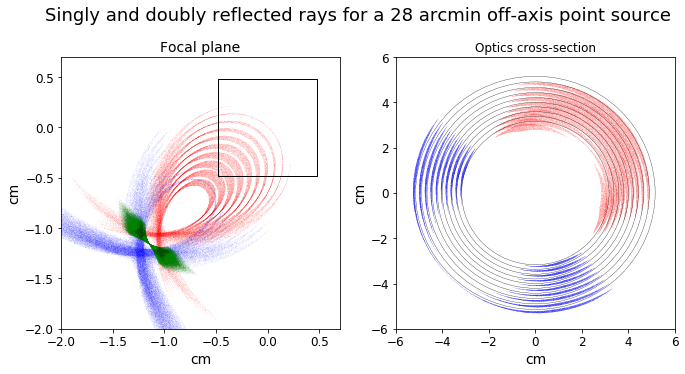

In [75]:
fig = plt.figure(figsize=(11,5))
st = fig.suptitle("Singly and doubly reflected rays for a 28 arcmin off-axis point source", fontsize=18,y=1.02)
plt.subplot(1,2,1)
plt.title('Focal plane',fontsize=14)
plt.xlabel('cm',fontsize=14);plt.ylabel('cm',fontsize=14)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)
plt.scatter(Hx,Hy,color='red',s=0.0001,alpha=0.7)
plt.scatter(Px,Py,color='blue',s=0.0001,alpha=0.7)
plt.scatter(Dx,Dy,color='green',s=0.0001,alpha=0.7)
plt.scatter(Sx,Sy,color='black',s=0.0001,alpha=0.7)
plt.ylim(-2.0,.7)
plt.xlim(-2.0,.7)
ax = plt.gca()
ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=1.))
## Cross-Section
plt.subplot(1,2,2)
ax = fig.gca()
# Plot Shells
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='k',fill=False,linewidth=.3)
    ax.add_artist(c)

# Plot random points
plt.scatter(CSPx,CSPy,s=0.00003,color='b')
plt.scatter(CSHx,CSHy,s=0.00003,color='r')
plt.title('Optics cross-section')
plt.xlabel('cm',fontsize=14);plt.ylabel('cm',fontsize=14)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()